In [9]:
import qutip
import numpy as np
import matplotlib.pyplot as plt

from relaqs.api import gates
from relaqs.api.gates import RandomSU2

In [26]:
n_unitaries = 10000
random_su2 = RandomSU2()
random_unitaries = [random_su2.get_matrix() for _ in range(n_unitaries)]
zero = np.array([1, 0]).reshape(2, 1)
random_states = [U @ zero for U in random_unitaries]

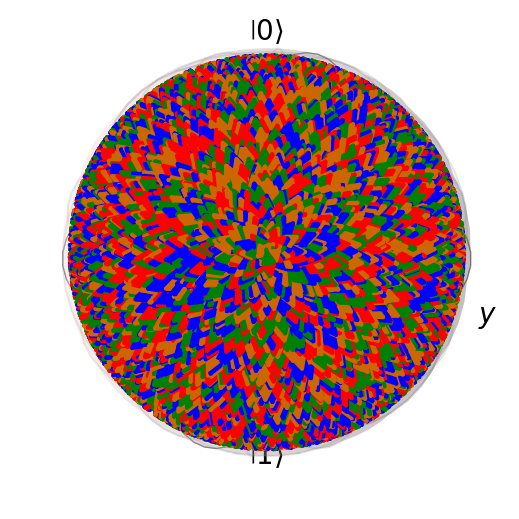

In [27]:
random_q_objs = [qutip.Qobj(state) for state in random_states]

b = qutip.Bloch()
b.add_states(random_q_objs)
b.show()

In [28]:
def statevector_to_cartesian_coordinates(statevector: np.ndarray):
    dm = statevector @ statevector.conj().T
    x = np.trace(gates.X().get_matrix() @ dm).real
    y = np.trace(gates.Y().get_matrix() @ dm).real
    z = np.trace(gates.Z().get_matrix() @ dm).real
    return [x, y, z]


In [29]:
def plot_bloch_sphere(bloch_vectors):
    """ Reference: https://pennylane.ai/qml/demos/tutorial_haar_measure/ """

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )


In [30]:
random_states_cartesian_coordiantes = np.array([statevector_to_cartesian_coordinates(state) for state in random_states])

/var/folders/1j/6dn4yyrn5zvcb2w5drnq1nn40000gn/T/ipykernel_94986/3958955415.py:11: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


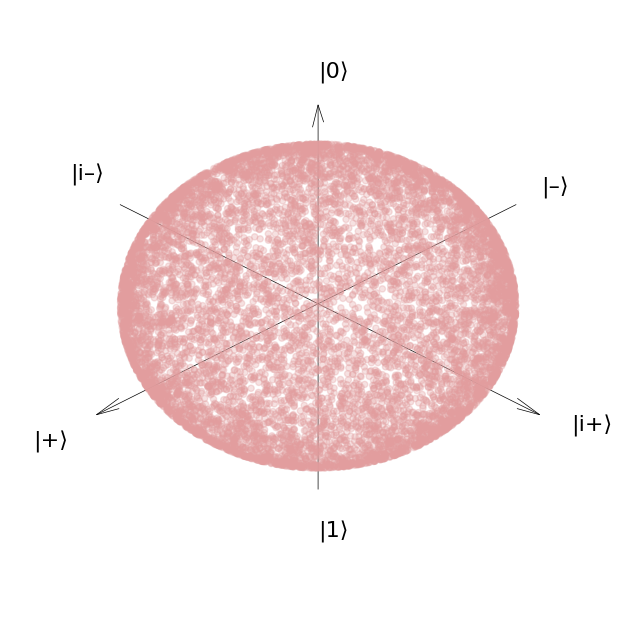

In [31]:
plot_bloch_sphere(random_states_cartesian_coordiantes)